In [ ]:
Hypothesis Testing and T Test Exercises

In [27]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data

Ho: On average, there is no difference in salaries between employees in the finance department and employees in the marketing department. 
Ha: There is a difference in salaries between employees in the finance department and the employees in the marketing department. 

Ho: There is no difference in number of employees in the finance dept and employees 
Ha: There is a difference in number of employees in the finance dept and employees.



# #T Test Exercises


In [3]:
xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

deg_free = n1 + n2 - 2

s_p = sqrt(((n1-1) * s1**2 +(n2-1) * s2**2)/(deg_free))
s_p

17.956702977389302

In [4]:
standard_error = se = sqrt(s1**2/n1 + s2**2/n2)

t=(xbar1 - xbar2)/ (s_p * sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [7]:
p = stats.t(deg_free).cdf(t)*2
p

0.01020985244923939

In [9]:
print(f't= {t:.4f}')
print(f'p = {p:.4f}')

t= -2.6252
p = 0.0102


In [19]:
t,p = stats.ttest_ind_from_stats(mean1=90,std1=15, nobs1 = 40, mean2=100, std2 = 20, nobs2=50)

In [20]:
t,p

(-2.6252287036468456, 0.01020985244923939)

In [21]:
alpha = .05

In [25]:
if p < alpha:
    print("Reject null hypothesis, there is evidence to suggest there is a difference in sales")
else: 
    print("Fail to reject null hypothesis")

Reject null hypothesis, there is evidence to suggest there is a difference in sales


Load the mpg dataset and use it to answer the following questions:

In [53]:
mpg_df = data('mpg')
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [58]:
#Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
list(mpg_df['year'].unique())

[1999, 2008]

In [59]:
mpg_df['fuel_efficiency'] = (mpg_df.hwy + mpg_df.cty)/2

In [60]:
cars_2008 = mpg_df[mpg_df.year==2008].fuel_efficiency
cars_1999 = mpg_df[mpg_df.year==1999].fuel_efficiency

In [61]:
#two tailed test, 2 samples

In [62]:
alpha = .05

<AxesSubplot:>

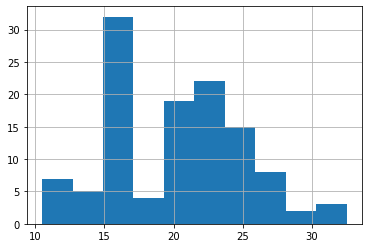

In [63]:
cars_2008.hist()

<AxesSubplot:>

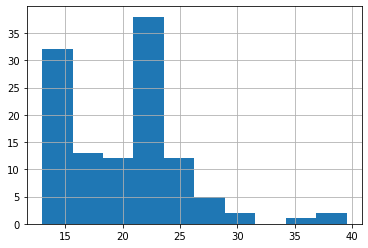

In [64]:
cars_1999.hist()

In [65]:
cars_2008.var(), cars_1999.var()

(24.097480106100797, 27.122605363984682)

In [66]:
t,p = stats.ttest_ind(cars_2008, cars_1999)
t,p,alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [67]:
#Since p is greater than our alpha, we fail to reject the null hypothesis. 
#There is not sufficient evidence to suggest fuel efficiencies are different for cars made in 1999 or 2008.


Are compact cars more fuel-efficient than the average car?

In [73]:

mpg_df.head()
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     234 non-null    object 
 1   model            234 non-null    object 
 2   displ            234 non-null    float64
 3   year             234 non-null    int64  
 4   cyl              234 non-null    int64  
 5   trans            234 non-null    object 
 6   drv              234 non-null    object 
 7   cty              234 non-null    int64  
 8   hwy              234 non-null    int64  
 9   fl               234 non-null    object 
 10  class            234 non-null    object 
 11  fuel_efficiency  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [84]:
mpg_df = mpg_df.rename(columns = {'class': "car_type"})
compact_fuel = mpg_df[mpg_df.car_type=="compact"].fuel_efficiency


In [77]:
list(mpg_df['car_type'].unique())

['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup', 'subcompact']

In [96]:
def car_type(x):
    if x =="compact":
        return "compact"
    else:
        return "not_compact"
mpg_df["is_compact"] = mpg_df.car_type.apply(car_type)

average_fuel = mpg_df[mpg_df.is_compact =="not_compact"].fuel_efficiency

In [97]:
alpha = .05

<AxesSubplot:>

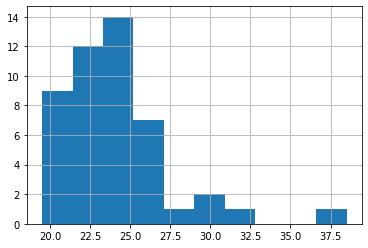

In [98]:
compact_fuel.hist()

<AxesSubplot:>

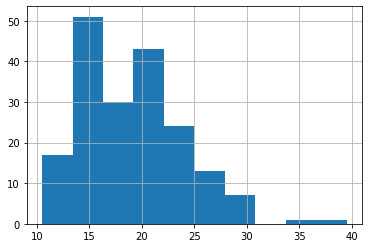

In [99]:
average_fuel.hist()

In [100]:
compact_fuel.var(), average_fuel.var()

(12.442876965772433, 23.652794548904602)

In [102]:
overall_mean = mpg_df.fuel_efficiency.mean()

In [103]:
t,p = stats.ttest_1samp(compact_fuel,overall_mean)
t,p,alpha

(7.896888573132535, 4.1985637943171336e-10, 0.05)

In [104]:
#P is less than alpha, so we reject null hypothesis.
#There is evidence to suggest compact cars are more fuel efficient than average.

Do manual cars get better gas mileage than automatic cars?

In [105]:
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,fuel_efficiency,is_compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,compact


In [106]:
def transmission(x):
    startswith = 'a'
    if x[0] in startswith:
        return "auto"
    else: 
        return "manual"


In [107]:
mpg_df["transmission"] = mpg_df.trans.apply(transmission)

In [111]:
auto = mpg_df[mpg_df.transmission =="auto"]
manual = mpg_df[mpg_df.transmission=="manual"]

mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,fuel_efficiency,is_compact,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,compact,auto


In [109]:
t,p=stats.ttest_ind(auto.fuel_efficiency, manual.fuel_efficiency)

In [112]:
t,p/2,alpha

(-4.593437735750014, 3.5771872005728416e-06, 0.05)

In [ ]:
#Since p is less than alpha, we fail to reject the null hypothesis.
#There is evidence to suggest automactic transmission cars have a lower fuel efficiency than manual.